In [274]:
#!pip install geopandas
#!pip install matplotlib
#!pip install mapclassify

In [275]:
#import the libraries needed for project
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import mapclassify
import numpy as np

In [ ]:
#read in json file into geopandas
gdf=geopandas.read_file('nyc_bb.geojson')
#read in csv file
dogs = pd.read_csv('dogs_lic.csv')
#read in second csv file
income = pd.read_csv('borough_income.csv')

<Axes: >

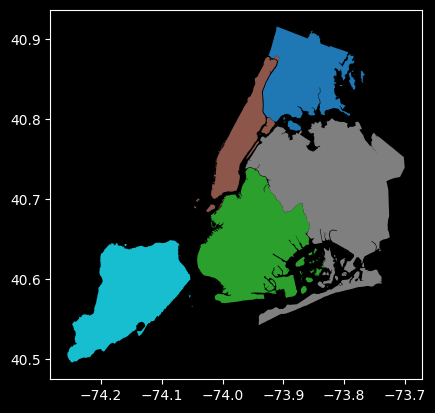

In [ ]:
#plotting the outline of New York's five boroughs
gdf.plot('boro_name')

In [ ]:
#adding a count column to count how many times each dog breed is used
dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).count().reset_index().rename(columns={'X':'Count'})

,boro_name,BreedName,Count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [ ]:
#grouping the dogs together by borough
dogs_grouped = dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).size().reset_index(name='count')


In [320]:
print(dogs_grouped)

          boro_name                     BreedName  count
0             Bronx                 Affenpinscher      2
1             Bronx                  Afghan Hound      3
2             Bronx              Airedale Terrier      1
3             Bronx                         Akita     18
4             Bronx              Akita Crossbreed      6
...             ...                           ...    ...
1216  Staten Island                       Whippet      7
1217  Staten Island              Wire Fox Terrier     15
1218  Staten Island                Xoloitzcuintli      1
1219  Staten Island             Yorkshire Terrier    738
1220  Staten Island  Yorkshire Terrier Crossbreed     41

[1221 rows x 3 columns]


In [281]:
#filter out unknown in breedname
dogs_grouped[dogs_grouped['BreedName']!= 'Unknown']

,boro_name,BreedName,count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [321]:
top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

C:\Users\sean8\AppData\Local\Temp\ipykernel_21100\3920167367.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


In [323]:
print(top_dog)

        boro_name                             BreedName  count
0           Bronx                               Unknown   1535
1           Bronx                     Yorkshire Terrier   1237
2           Bronx                              Shih Tzu   1101
3           Bronx                             Chihuahua    861
4           Bronx    American Pit Bull Terrier/Pit Bull    718
5        Brooklyn                               Unknown   4143
6        Brooklyn                     Yorkshire Terrier   2002
7        Brooklyn                              Shih Tzu   1893
8        Brooklyn                             Chihuahua   1511
9        Brooklyn  American Pit Bull Mix / Pit Bull Mix   1072
10      Manhattan                               Unknown   5640
11      Manhattan                     Yorkshire Terrier   2087
12      Manhattan                             Chihuahua   1922
13      Manhattan                              Shih Tzu   1843
14      Manhattan                    Labrador Retriever

In [283]:
boro_dog = gdf.merge(top_dog, on='boro_name', how='inner')

boro_dog

,boro_code,boro_name,shape_area,shape_leng,geometry,BreedName,count
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Unknown,4143
1,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Yorkshire Terrier,2002
2,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Shih Tzu,1893
3,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Unknown,1768
4,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Yorkshire Terrier,738
5,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Shih Tzu,731
6,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Unknown,5640
7,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Yorkshire Terrier,2087
8,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Chihuahua,1922
9,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",Unknown,1535


<function matplotlib.pyplot.show(close=None, block=None)>

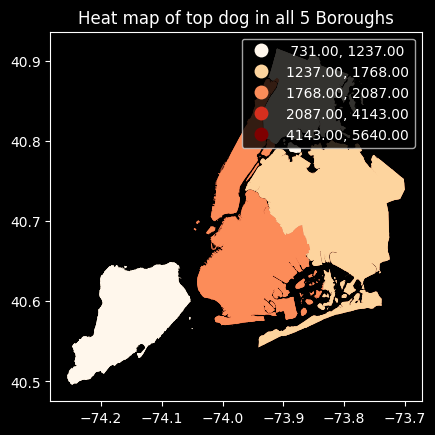

In [ ]:
#making a plot of the 5 boroughs with the most popular dog breed, counting the total, changing the color and layout
title = boro_dog.plot('count', legend=True, cmap='OrRd', scheme='natural_breaks')
#adding title to plot
title.set_title('Heat map of top dog in all 5 Boroughs')
#showing the plot
plt.show

In [286]:
df_inner = pd.merge(dogs, income, on='boro_name', how='inner')

df_inner

,Unnamed: 0,X,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,boro_name,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate,Income
0,1,1,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016,76780
1,2,2,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016,76780
2,3,3,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016,47260
3,4,4,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016,76780
4,5,5,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016,47260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121857,121928,121945,122225,ROCKY,M,06/01/2014 12:00:00 AM,Boston Terrier,Manhattan,10022,106.0,98.0,MN19,4.0,12.0,28.0,12/31/2016,12/31/2018,99530
121858,121929,121946,122226,ROXY,F,10/01/2007 12:00:00 AM,"Collie, Border",Brooklyn,11219,311.0,250.0,BK28,38.0,10.0,22.0,12/31/2016,09/18/2018,76780
121859,121930,121947,122227,VALENTINA,F,05/01/2016 12:00:00 AM,German Shepherd Crossbreed,Staten Island,10312,503.0,17008.0,SI48,51.0,11.0,24.0,12/31/2016,12/31/2017,91632
121860,121931,121948,122228,VENUS,F,12/01/2010 12:00:00 AM,Yorkshire Terrier,Bronx,10455,201.0,79.0,BX34,8.0,15.0,29.0,12/31/2016,06/06/2017,47260


In [287]:
df_inner.drop(columns = ['Unnamed: 0', 'X', 'ZipCode', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth', 'RowNumber', 'CommunityDistrict', 'CensusTract2010', 'NTA', 'CityCouncilDistrict', 'CongressionalDistrict', 'StateSenatorialDistrict', 'LicenseIssuedDate', 'LicenseExpiredDate'])

,BreedName,boro_name,Income
0,Beagle,Brooklyn,76780
1,Boxer,Brooklyn,76780
2,Maltese,Bronx,47260
3,Pug,Brooklyn,76780
4,Maltese,Bronx,47260
...,...,...,...
121857,Boston Terrier,Manhattan,99530
121858,"Collie, Border",Brooklyn,76780
121859,German Shepherd Crossbreed,Staten Island,91632
121860,Yorkshire Terrier,Bronx,47260


In [289]:
source_data = df_inner[df_inner['boro_name'] == 'Brooklyn']

In [324]:
print(source_data)

        Unnamed: 0       X  RowNumber AnimalName AnimalGender  \
0                1       1       1753    SHADOW             M   
1                2       2       2415      ROCCO            M   
3                4       4       7537    PETUNIA            F   
5                6       6      10503    BRANDY             M   
8                9       9      12652       RUBY            F   
...            ...     ...        ...        ...          ...   
121839      121910  121927     122207      BRUNO            M   
121840      121911  121928     122208     BRUNO             M   
121847      121918  121935     122215     ZAINA             F   
121851      121922  121939     122219   KRAFCSIK            M   
121858      121929  121946     122226      ROXY             F   

              AnimalBirthMonth                           BreedName boro_name  \
0       01/01/2000 12:00:00 AM                              Beagle  Brooklyn   
1       10/01/2011 12:00:00 AM                             

In [290]:
top_breeds_grouped = source_data.groupby('BreedName').count().reset_index()


In [291]:
top_breeds_grouped

,BreedName,Unnamed: 0,X,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,boro_name,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate,Income
0,Affenpinscher,12,12,12,12,12,12,12,12,11,11,11,11,11,11,12,12,12
1,Afghan Hound,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Airedale Terrier,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,Akita,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
4,Akita Crossbreed,17,17,17,17,17,17,17,17,16,16,16,16,16,16,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Whippet,38,38,38,38,38,38,38,38,36,36,36,36,36,36,38,38,38
265,Wire Fox Terrier,40,40,40,40,40,40,40,40,39,39,39,39,39,39,40,40,40
266,Wirehaired Pointing Griffon,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
267,Yorkshire Terrier,2002,2002,2002,1992,2002,2002,2002,2002,1943,1943,1943,1943,1943,1943,2002,2002,2002


In [292]:
dogs_ascended = top_breeds_grouped[['BreedName', 'X']].rename(columns={'X':'count'}).sort_values('count', ascending = False)

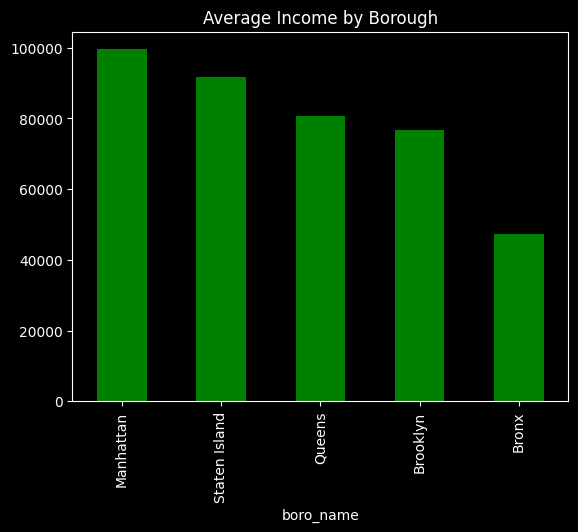

In [293]:
# Group by boro_name and calculate mean income 
income_means = df_inner[['boro_name', 'Income']].groupby('boro_name')['Income'].mean().reset_index() 
# Sort by mean income in descending order 
income_means_sorted = income_means.sort_values(by='Income', ascending=False) 
# Plot the sorted results 
income_means_sorted.plot(kind='bar', x='boro_name', y='Income', color='green', legend=False, title='Average Income by Borough')
 # Show the plot
plt.show()

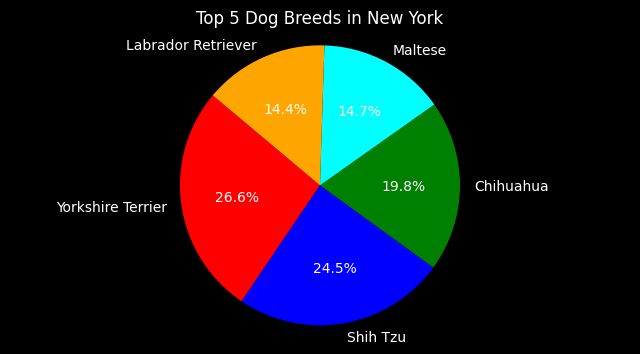

In [310]:
# Count the occurrences of each breed
breed_counts = df_inner['BreedName'].value_counts().reset_index()

# Rename columns for better readability
breed_counts.columns = ['BreedName', 'Count']

# Filter out 'Unknown' breeds
filtered_breed_counts = breed_counts[breed_counts['BreedName'] != 'Unknown']

# Sort the results by count in descending order
sorted_breed_counts = filtered_breed_counts.sort_values(by='Count', ascending=False)

# Display the top 5 results
top_5_breeds = sorted_breed_counts.head(5)

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(top_5_breeds['Count'], labels=top_5_breeds['BreedName'], autopct='%1.1f%%', startangle=140, colors=['red','blue','green','aqua', 'orange'])
plt.title('Top 5 Dog Breeds in New York')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

<Axes: title={'center': 'Top 5 Dog Breeds in Brooklyn'}, xlabel='BreedName'>

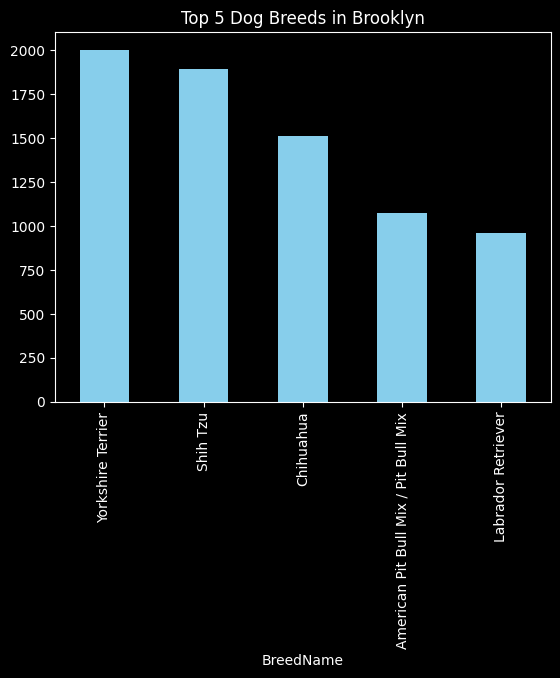

In [294]:
brooklyn_df = df_inner[df_inner['boro_name'] == 'Brooklyn'][['boro_name', 'BreedName']] 
# Group by BreedName, count the occurrences, and reset index for further filtering 
brooklyn_breed_counts = brooklyn_df.groupby('BreedName').count().reset_index() 
# Filter out 'Unknown' breeds 
brooklyn_filtered_breed_counts = brooklyn_breed_counts[brooklyn_breed_counts['BreedName'] != 'Unknown'] 
# Sort by boro_name count, get top 5 breeds, and set index for plotting 
brooklyn_top_5_breeds = brooklyn_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName') 
# Plot the results 
brooklyn_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Brooklyn', color='skyblue')

<Axes: title={'center': 'Top 5 Dog Breeds in Bronx'}, xlabel='BreedName'>

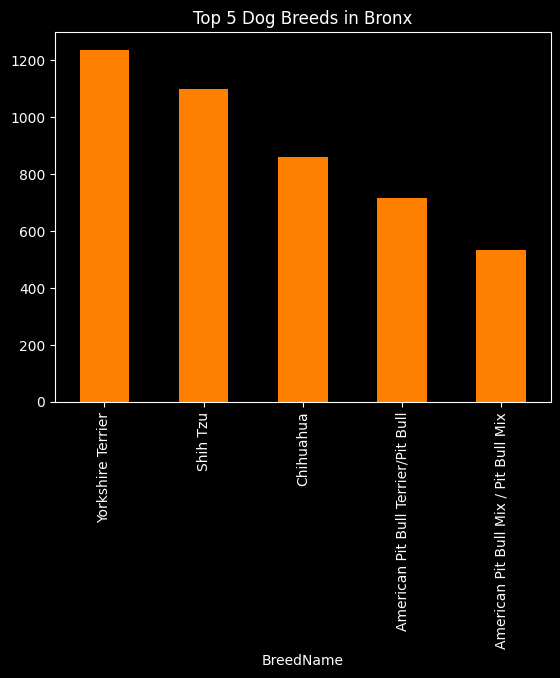

In [295]:
# Filter for Bronx borough 
bronx_df = df_inner[df_inner['boro_name'] == 'Bronx'][['boro_name', 'BreedName']] 
# Group by BreedName, count the occurrences, and reset index for further filtering 
bronx_breed_counts = bronx_df.groupby('BreedName').count().reset_index() 
# Filter out 'Unknown' breeds 
bronx_filtered_breed_counts = bronx_breed_counts[bronx_breed_counts['BreedName'] != 'Unknown'] 
# Sort by boro_name count, get top 5 breeds, and set index for plotting 
bronx_top_5_breeds = bronx_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName') 
# Plot the results 
bronx_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Bronx', color = '#ff7f00')

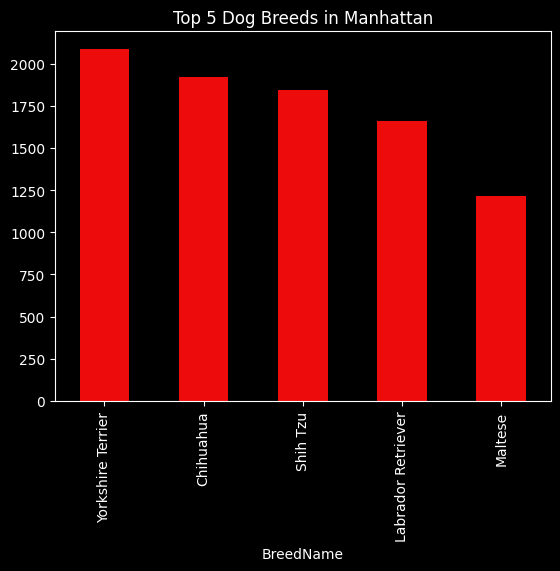

In [296]:
# Filter for Manhattan borough
manhattan_df = df_inner[df_inner['boro_name'] == 'Manhattan'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
manhattan_breed_counts = manhattan_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
manhattan_filtered_breed_counts = manhattan_breed_counts[manhattan_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
manhattan_top_5_breeds = manhattan_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
manhattan_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Manhattan', color='#ee0b0b')

# Show the plot
plt.show()

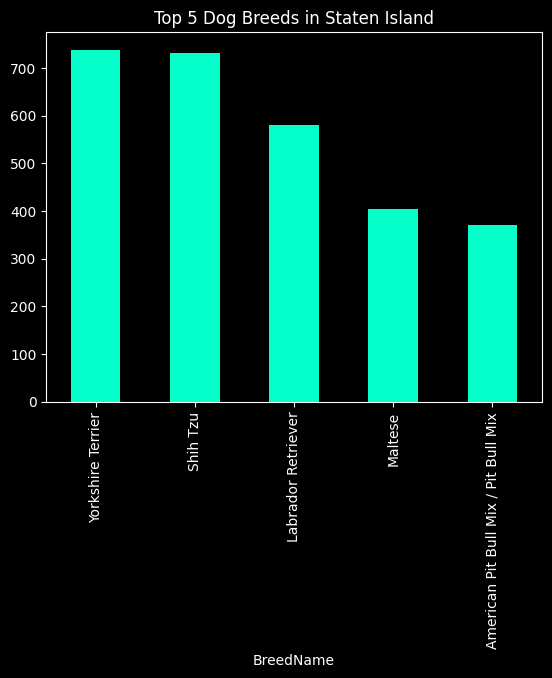

In [297]:
# Filter for Staten Island borough
staten_island_df = df_inner[df_inner['boro_name'] == 'Staten Island'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
staten_island_breed_counts = staten_island_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
staten_island_filtered_breed_counts = staten_island_breed_counts[staten_island_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
staten_island_top_5_breeds = staten_island_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
staten_island_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Staten Island', color='#04ffca')

# Show the plot
plt.show()

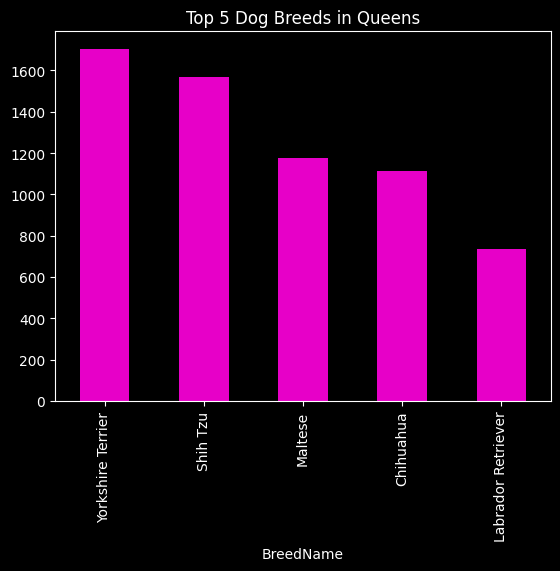

In [298]:
# Filter for Queens borough
queens_df = df_inner[df_inner['boro_name'] == 'Queens'][['boro_name', 'BreedName']]

# Group by BreedName, count the occurrences, and reset index for further filtering
queens_breed_counts = queens_df.groupby('BreedName').count().reset_index()

# Filter out 'Unknown' breeds
queens_filtered_breed_counts = queens_breed_counts[queens_breed_counts['BreedName'] != 'Unknown']

# Sort by boro_name count, get top 5 breeds, and set index for plotting
queens_top_5_breeds = queens_filtered_breed_counts.sort_values(by='boro_name', ascending=False).head(5).set_index('BreedName')

# Plot the results
queens_top_5_breeds.plot(kind='bar', y='boro_name', legend=False, title='Top 5 Dog Breeds in Queens', color='#e700c8')

# Show the plot
plt.show()